<a href="https://colab.research.google.com/github/priyadarshighosh/EDA/blob/main/EDA1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                    #numpy to work with numerical variable
import pandas as pd                                   #pandas to work with dataframe
import matplotlib.pyplot as plt                       #matplotlib  and seaborn to plot the graph
import seaborn as sns


# Importing the FILE

In [ ]:
from google.colab import files    # we are importing the file from the device
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (3).csv


# Data about the FILE

In [ ]:
df=pd.read_csv('Titanic-Dataset.csv')   #fitting the data in the df dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()                   #this gives information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 177 null values in age and 687 missing values in cabin
As we have more than 70 perc perc missing values in cabin . we gonna Drop it


In [ ]:
print (df.isnull().sum())   #summation of the all the

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


embarked has 2 missing we gonna fill it

In [ ]:
df = df.drop(['Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


These are the details about the age mean is around 29.6 median is 28

In [ ]:
df['Age'].median()

28.0

In [ ]:
df =  df.fillna(df['Age'].median()+1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


We handled all the missing values



# Feature Selection

In [ ]:
df = df.drop(['PassengerId'],axis=1)
df = df.drop(['Name'],axis=1)
df = df.drop(['Ticket'],axis=1)        #we are dropping the columns we think are not important
                                        #we are dropping passenger id , name and tciket give us personal information we dont need it
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

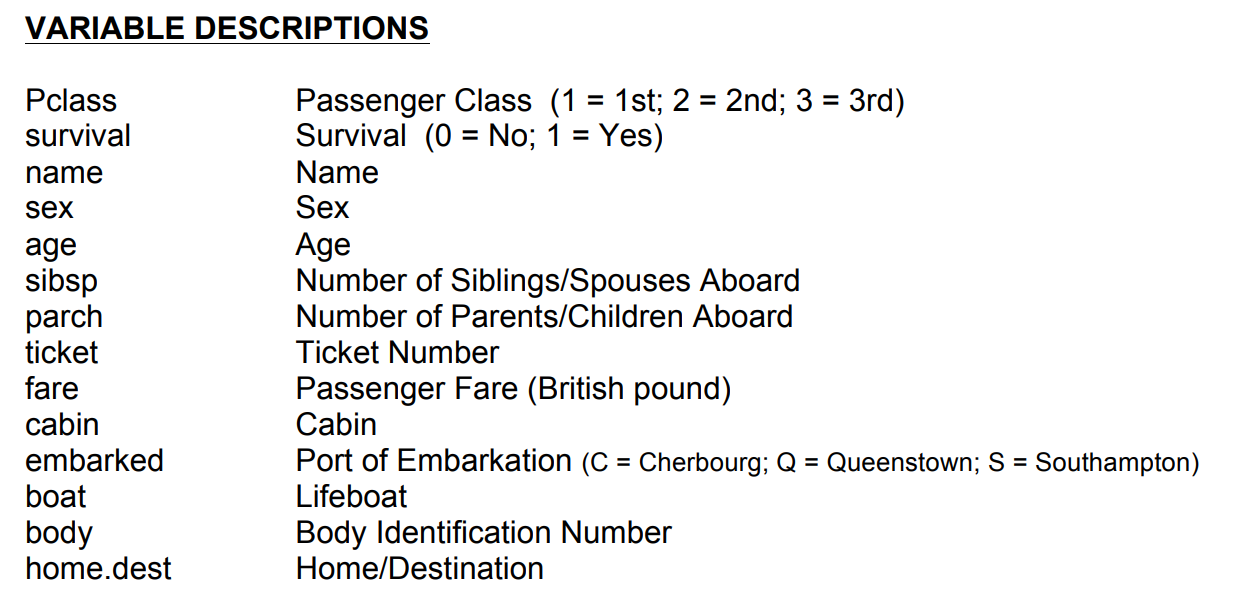

We want to decrease the dimentionality of the of the model so we will bunch up

*   no of siblings/spouses Aboard
*   no of parents / children Aboard

In One column name Fnum that would signitfy no of family members aboard



In [ ]:
# prompt: add 2 columns sibsp and parch to form a new column Fnum


df["Fnum"] = df["SibSp"] + df["Parch"]              #
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Fnum      891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fnum
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [ ]:
df = df.drop(['Parch'],axis=1)
df = df.drop(['SibSp'],axis=1)                        #we dropped the sibling children and parents children
                                                       # because we already added them to Family member num

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fnum
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [ ]:
df['Fnum'].describe()


,Fnum
count,891.000000
mean,0.904602
std,1.613459
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,10.000000


In [ ]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Fnum
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,29.0,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


# EDA AUTOMATION using Panda Profiling

In [ ]:
!pip install pandas-profiling


In [ ]:
!pip install -U ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

df

,Survived,Pclass,Sex,Age,Fare,Embarked,Fnum
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,29.0,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


In [ ]:
df =sns.load_dataset('titanic')

In [ ]:
profile.to_file("output.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]